**Toxic Comments**
* Melike Kurt

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import re

In [2]:
train = pd.read_csv('/Users/technopc/Desktop/Data Mining/proje_dataset/train.csv')

**Sampling**

In [3]:
sample = train.sample(n=100000)

**PRE-PROCESSING**

In [4]:
# kucuk harflere donusturuyoruz
sample["comment_text"]=sample["comment_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing Hyperlinks from text

sample["comment_text"] = sample["comment_text"].map(lambda x: re.sub(r"https?://\S+|www\.\S+","",x) )
#noktalama isaretlerini silelim
sample["comment_text"]=sample["comment_text"].str.replace("[^\w\s]","")
#sayilari silelim
sample["comment_text"]=sample["comment_text"].str.replace("\d","")
#emoji
sample["comment_text"] = sample["comment_text"].map(lambda x: re.sub("["
                                        u"\U0001F600-\U0001F64F"
                                        u"\U0001F300-\U0001F5FF"  
                                        u"\U0001F680-\U0001F6FF" 
                                        u"\U0001F1E0-\U0001F1FF"  
                                        u"\U00002702-\U000027B0"
                                        u"\U000024C2-\U0001F251"
                                                                    "]+","", x, flags=re.UNICODE))
#missing value
sample.fillna(0)

C:\Users\technopc\AppData\Local\Temp/ipykernel_9272/3424953101.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  sample["comment_text"]=sample["comment_text"].str.replace("[^\w\s]","")
C:\Users\technopc\AppData\Local\Temp/ipykernel_9272/3424953101.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  sample["comment_text"]=sample["comment_text"].str.replace("\d","")


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
647582,1035055,0.000000,typically it is only possible to obtain a birt...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,314338,approved,1,0,0,1,1,0.0,0,4
1723414,6234944,0.000000,during a work meeting between the potential hi...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,393830,approved,0,0,0,8,1,0.0,0,4
654126,1042749,0.473684,this is unacceptable she must be forced to bow...,0.0,0.013158,0.013158,0.421053,0.013158,0.0,0.0,...,314793,approved,0,0,0,4,2,0.0,4,76
533994,896559,0.200000,pointing out that three nations that make up n...,0.0,0.000000,0.000000,0.200000,0.000000,0.0,0.0,...,163985,approved,0,0,0,0,0,0.0,0,5
948427,5278883,0.000000,mankind is the most destructive invasive speci...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,335818,approved,0,0,0,0,0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22978,270186,0.000000,how would you suggest that the nation fund sci...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,56765,approved,0,0,0,0,0,0.0,0,4
432788,773345,0.500000,political opinions aside putin just seriously ...,0.0,0.500000,0.000000,0.100000,0.000000,0.0,0.0,...,159235,approved,0,0,0,3,2,0.0,0,10
1377853,5801795,0.400000,saeed kosravi was a terrible employee his accu...,0.0,0.100000,0.100000,0.400000,0.100000,0.0,0.0,...,367895,approved,0,4,0,1,0,0.0,0,10
163507,441849,0.000000,feel for you folks who live in losanchorage a...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,144061,approved,0,0,0,0,0,0.0,0,4


In [5]:
# stop words
!pip install nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\technopc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
sample["comment_text"]=sample["comment_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

**Lemmatization**

In [7]:
import textblob
from textblob import Word
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\technopc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
sample["comment_text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

647582     typically possible obtain birth certificate im...
1723414    work meeting potential hirer hiree sorry textb...
654126     unacceptable must forced bow entire party sham...
533994     pointing three nation make north america corre...
948427     mankind destructive invasive specie thanks poi...
                                 ...                        
22978      would suggest nation fund scientific research ...
432788     political opinion aside putin seriously outpla...
1377853    saeed kosravi terrible employee accusation lie...
163507     feel folk live losanchorage town need serious ...
974693     well written article didnt know huge trade def...
Name: comment_text, Length: 100000, dtype: object

**Featureların Düzenlenmesi**

In [9]:
sample.isnull().sum()

id                                         0
target                                     0
comment_text                               0
severe_toxicity                            0
obscene                                    0
identity_attack                            0
insult                                     0
threat                                     0
asian                                  77573
atheist                                77573
bisexual                               77573
black                                  77573
buddhist                               77573
christian                              77573
female                                 77573
heterosexual                           77573
hindu                                  77573
homosexual_gay_or_lesbian              77573
intellectual_or_learning_disability    77573
jewish                                 77573
latino                                 77573
male                                   77573
muslim    

In [10]:
sample.dropna(axis =1, inplace=True )
sample

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,created_date,publication_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
647582,1035055,0.000000,typically possible obtain birth certificate im...,0.0,0.000000,0.000000,0.000000,0.000000,2017-02-23 17:39:38.581608+00,55,314338,approved,1,0,0,1,1,0.0,0,4
1723414,6234944,0.000000,work meeting potential hirer hiree sorry textb...,0.0,0.000000,0.000000,0.000000,0.000000,2017-10-27 16:18:10.752524+00,54,393830,approved,0,0,0,8,1,0.0,0,4
654126,1042749,0.473684,unacceptable must forced bow entire party sham...,0.0,0.013158,0.013158,0.421053,0.013158,2017-02-25 01:43:50.796958+00,54,314793,approved,0,0,0,4,2,0.0,4,76
533994,896559,0.200000,pointing three nations make north america corr...,0.0,0.000000,0.000000,0.200000,0.000000,2017-01-25 18:18:48.974046+00,54,163985,approved,0,0,0,0,0,0.0,0,5
948427,5278883,0.000000,mankind destructive invasive species thanks po...,0.0,0.000000,0.000000,0.000000,0.000000,2017-05-19 21:19:20.898875+00,21,335818,approved,0,0,0,0,0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22978,270186,0.000000,would suggest nation fund scientific research ...,0.0,0.000000,0.000000,0.000000,0.000000,2016-04-05 15:19:50.340546+00,13,56765,approved,0,0,0,0,0,0.0,0,4
432788,773345,0.500000,political opinions aside putin seriously outpl...,0.0,0.500000,0.000000,0.100000,0.000000,2016-12-31 07:33:12.102024+00,21,159235,approved,0,0,0,3,2,0.0,0,10
1377853,5801795,0.400000,saeed kosravi terrible employee accusations li...,0.0,0.100000,0.100000,0.400000,0.100000,2017-08-19 17:55:42.990816+00,22,367895,approved,0,4,0,1,0,0.0,0,10
163507,441849,0.000000,feel folks live losanchorage town need serious...,0.0,0.000000,0.000000,0.000000,0.000000,2016-08-21 23:26:43.977660+00,21,144061,approved,0,0,0,0,0,0.0,0,4


In [11]:
delete = ['identity_annotator_count','created_date','rating','publication_id','article_id','funny','wow','sad','likes','disagree','toxicity_annotator_count']

In [12]:
sample.drop(delete,axis=1,inplace=True)

In [13]:
sample["non_toxic"] = sample.iloc[:,3:9].apply(lambda x: 1 if (sum(x)==0)  else 0, axis=1)

In [14]:
sample

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,non_toxic
647582,1035055,0.000000,typically possible obtain birth certificate im...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1
1723414,6234944,0.000000,work meeting potential hirer hiree sorry textb...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1
654126,1042749,0.473684,unacceptable must forced bow entire party sham...,0.0,0.013158,0.013158,0.421053,0.013158,0.0,0
533994,896559,0.200000,pointing three nations make north america corr...,0.0,0.000000,0.000000,0.200000,0.000000,0.0,0
948427,5278883,0.000000,mankind destructive invasive species thanks po...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
22978,270186,0.000000,would suggest nation fund scientific research ...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1
432788,773345,0.500000,political opinions aside putin seriously outpl...,0.0,0.500000,0.000000,0.100000,0.000000,0.0,0
1377853,5801795,0.400000,saeed kosravi terrible employee accusations li...,0.0,0.100000,0.100000,0.400000,0.100000,0.0,0
163507,441849,0.000000,feel folks live losanchorage town need serious...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1


In [15]:
sample.iloc[:,3:9].describe().T

,count,mean,std,min,25%,50%,75%,max
severe_toxicity,100000.0,0.004483,0.022630,0.0,0.0,0.0,0.000000,0.5
obscene,100000.0,0.013972,0.064822,0.0,0.0,0.0,0.000000,1.0
identity_attack,100000.0,0.022450,0.078166,0.0,0.0,0.0,0.000000,1.0
insult,100000.0,0.081019,0.176127,0.0,0.0,0.0,0.057692,1.0
threat,100000.0,0.009112,0.048548,0.0,0.0,0.0,0.000000,1.0
sexual_explicit,100000.0,0.006579,0.044859,0.0,0.0,0.0,0.000000,1.0


In [16]:
threshold = sample.iloc[:,3:9].mean().sum()/6
threshold

0.022935918750585278

In [17]:
sample["hafif_toxic"] = sample.iloc[:,3:9].apply(lambda x: 1 if (sum(x)/6<threshold and sum(x)>0)  else 0, axis=1)

In [18]:
sample["asiri_toxic"] = sample.iloc[:,3:9].apply(lambda x: 1 if (sum(x)/6>threshold)  else 0, axis=1)

In [19]:
sample

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,non_toxic,hafif_toxic,asiri_toxic
647582,1035055,0.000000,typically possible obtain birth certificate im...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0
1723414,6234944,0.000000,work meeting potential hirer hiree sorry textb...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0
654126,1042749,0.473684,unacceptable must forced bow entire party sham...,0.0,0.013158,0.013158,0.421053,0.013158,0.0,0,0,1
533994,896559,0.200000,pointing three nations make north america corr...,0.0,0.000000,0.000000,0.200000,0.000000,0.0,0,0,1
948427,5278883,0.000000,mankind destructive invasive species thanks po...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22978,270186,0.000000,would suggest nation fund scientific research ...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0
432788,773345,0.500000,political opinions aside putin seriously outpl...,0.0,0.500000,0.000000,0.100000,0.000000,0.0,0,0,1
1377853,5801795,0.400000,saeed kosravi terrible employee accusations li...,0.0,0.100000,0.100000,0.400000,0.100000,0.0,0,0,1
163507,441849,0.000000,feel folks live losanchorage town need serious...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0


**Regresyon**

In [20]:
for col in sample.iloc[:,3:9]:
    highest_values = abs(sample.iloc[:,3:9].corr()[col]).nlargest(n=5) # en yüksek korelasyona sahip 5 değeri alalım
    print(highest_values)

severe_toxicity    1.000000
obscene            0.342270
insult             0.327412
threat             0.281936
identity_attack    0.247437
Name: severe_toxicity, dtype: float64
obscene            1.000000
insult             0.425329
severe_toxicity    0.342270
sexual_explicit    0.329012
identity_attack    0.128058
Name: obscene, dtype: float64
identity_attack    1.000000
insult             0.311581
severe_toxicity    0.247437
threat             0.146921
obscene            0.128058
Name: identity_attack, dtype: float64
insult             1.000000
obscene            0.425329
severe_toxicity    0.327412
identity_attack    0.311581
sexual_explicit    0.143125
Name: insult, dtype: float64
threat             1.000000
severe_toxicity    0.281936
identity_attack    0.146921
insult             0.108523
obscene            0.096945
Name: threat, dtype: float64
sexual_explicit    1.000000
obscene            0.329012
severe_toxicity    0.203795
insult             0.143125
identity_attack    0.113

In [21]:
  for index, value in highest_values.items():
        if 1> value >=0.3:
            print(index, col, "değişkenleri yüksek korelasyona sahip: ", value)

obscene sexual_explicit değişkenleri yüksek korelasyona sahip:  0.32901192501210613


In [22]:
# yuksek korelasyona sahip olanlari cikaralim => obscene, sexual_explicit
sample = sample.drop(['obscene','sexual_explicit'], axis=1)

In [23]:
sample

,id,target,comment_text,severe_toxicity,identity_attack,insult,threat,non_toxic,hafif_toxic,asiri_toxic
647582,1035055,0.000000,typically possible obtain birth certificate im...,0.0,0.000000,0.000000,0.000000,1,0,0
1723414,6234944,0.000000,work meeting potential hirer hiree sorry textb...,0.0,0.000000,0.000000,0.000000,1,0,0
654126,1042749,0.473684,unacceptable must forced bow entire party sham...,0.0,0.013158,0.421053,0.013158,0,0,1
533994,896559,0.200000,pointing three nations make north america corr...,0.0,0.000000,0.200000,0.000000,0,0,1
948427,5278883,0.000000,mankind destructive invasive species thanks po...,0.0,0.000000,0.000000,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
22978,270186,0.000000,would suggest nation fund scientific research ...,0.0,0.000000,0.000000,0.000000,1,0,0
432788,773345,0.500000,political opinions aside putin seriously outpl...,0.0,0.000000,0.100000,0.000000,0,0,1
1377853,5801795,0.400000,saeed kosravi terrible employee accusations li...,0.0,0.100000,0.400000,0.100000,0,0,1
163507,441849,0.000000,feel folks live losanchorage town need serious...,0.0,0.000000,0.000000,0.000000,1,0,0


In [24]:
#elimizde kalan columnlara gore ayristiralim
x = sample[['severe_toxicity','identity_attack']]
y = sample[['insult','threat']]

In [25]:
import sklearn
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [0.05929222 0.00545036]
Coefficients: 
 [[2.07519428 0.55340993]
 [0.5611929  0.05104823]]


In [26]:
import statsmodels.api as sm
# with statsmodels
x = sm.add_constant(x) # adding a constant

C:\Users\technopc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.linear_model import LinearRegression
coklu_regresyon = linear_model.LinearRegression()
coklu_regresyon.fit(x_train, y_train)
#katsayılar
print(coklu_regresyon.coef_.round(2))
print(coklu_regresyon.intercept_.round(2))

[[0.   2.03 0.55]
 [0.   0.55 0.05]]
[0.06 0.01]


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sample_y_predicted = coklu_regresyon.predict(x_test)
print(mean_squared_error(y_test, sample_y_predicted, squared=False))
print(r2_score(y_test, sample_y_predicted))

0.10272052629863099
0.1350966755294577


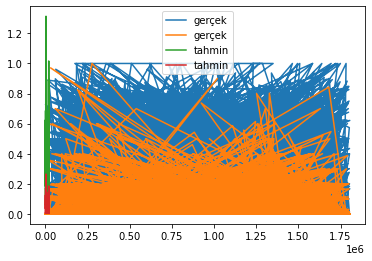

In [30]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='gerçek')
plt.plot(sample_y_predicted, label='tahmin')
plt.legend();

**TF-IDF**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [45]:
X = vectorizer.fit_transform(sample["comment_text"].head(500).values)

In [46]:
print(vectorizer.get_feature_names())
print(X.toarray())

['aba', 'abandon', 'abide', 'abilities', 'ability', 'able', 'abolishing', 'absent', 'absolute', 'absolutely', 'absolve', 'abstract', 'absurd', 'abundant', 'abuse', 'abused', 'abusing', 'abusive', 'aca', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'accessing', 'accident', 'accomplished', 'accomplishes', 'according', 'account', 'accounting', 'accounts', 'accumulated', 'accurate', 'achieved', 'acknowledge', 'aclu', 'acolyte', 'acres', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'activists', 'activities', 'activity', 'actor', 'actress', 'acts', 'actual', 'actuality', 'actually', 'ad', 'adams', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'addresses', 'addressing', 'adds', 'adequate', 'adios', 'administer', 'administration', 'administrations', 'admit', 'adn', 'adopt', 'adopted', 'adoption', 'adoptions', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventurism', 'adviser', 'advocate', 'affect', 'affects', 'affilia

**PCA**

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

**Satndardization**

In [48]:
scaler = StandardScaler()
sample_std = scaler.fit_transform(X.toarray())

In [49]:
newdf = pd.DataFrame(X.toarray())
newdf

,0,1,2,3,4,5,6,7,8,9,...,5019,5020,5021,5022,5023,5024,5025,5026,5027,5028
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.403886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
scalar = StandardScaler()
#scaled_data = pd.DataFrame(scalar.fit_transform(sample.iloc[:,3:9])) #scaling the data
scaled_data = newdf
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,5019,5020,5021,5022,5023,5024,5025,5026,5027,5028
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.403886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
import matplotlib.pyplot as plt

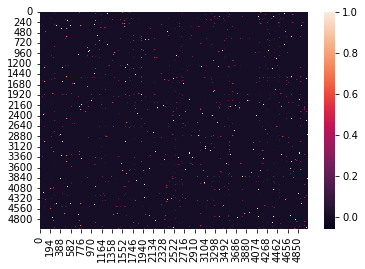

In [52]:
sns.heatmap(scaled_data.corr());


In [57]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
scores_pca = pca.transform(sample_std)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca

,PC1,PC2,PC3
0,-0.007083,0.299165,-0.040123
1,-0.045657,-0.015338,0.044587
2,-0.045606,0.031371,0.051582
3,-0.033268,-0.014795,0.030673
4,-0.047296,-0.011863,0.047420
...,...,...,...
495,-0.035589,-0.006512,0.012711
496,-0.049502,0.006789,0.079009
497,-0.039485,-0.017279,0.019225
498,-0.010243,0.141900,0.001223


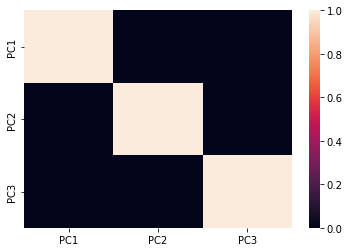

In [56]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr());

* Yukarıdaki ısı haritası, elde edilen çeşitli ana bileşenler (PC1, PC2 ve PC3) arasında hiçbir korelasyon olmadığını açıkça göstermektedir.
* Böylece, elde edilen PC'ler arasında herhangi bir korelasyon olmamasını minimum düzeyde sağlarken, daha yüksek boyutlu özellik uzayından daha düşük boyutlu bir özellik 
* uzayına geçmiş olduk. Böylece PCA'nın hedeflerini gerçekleştirdik

**K-means clustering with PCA**

In [60]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i , init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\technopc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


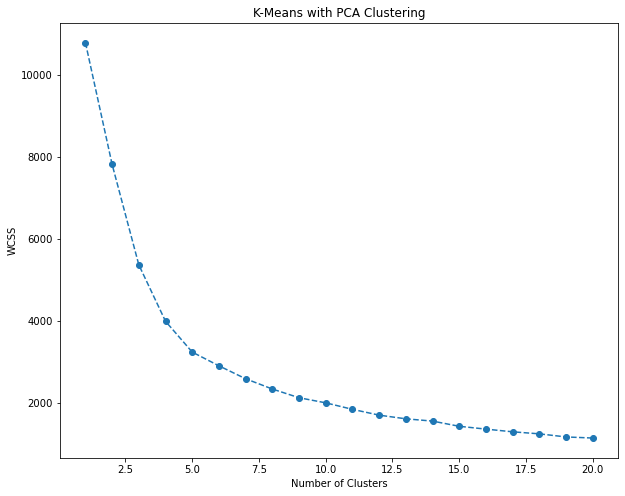

In [61]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss , marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

In [65]:
#Uygulayalım
kmeans_pca = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)

In [66]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [68]:
# ANALİZ
sample_pca_kmeans = pd.concat([sample.head(500).reset_index(drop = True), pd.DataFrame(scores_pca)],axis = 1)
sample_pca_kmeans.columns.values[-3:]= ['Component 1','Component 2','Component 3']
sample_pca_kmeans['Sample K-Means PCA'] = kmeans_pca.labels_

In [69]:
sample_pca_kmeans.head()

,id,target,comment_text,severe_toxicity,identity_attack,insult,threat,non_toxic,hafif_toxic,asiri_toxic,Component 1,Component 2,Component 3,Sample K-Means PCA
0,1035055,0.000000,typically possible obtain birth certificate im...,0.0,0.000000,0.000000,0.000000,1,0,0,-0.158927,12.175290,-1.483912,2
1,6234944,0.000000,work meeting potential hirer hiree sorry textb...,0.0,0.000000,0.000000,0.000000,1,0,0,-1.910426,-0.554812,2.588555,1
2,1042749,0.473684,unacceptable must forced bow entire party sham...,0.0,0.013158,0.421053,0.013158,0,0,1,-1.717164,1.440329,2.653685,1
3,896559,0.200000,pointing three nations make north america corr...,0.0,0.000000,0.200000,0.000000,0,0,1,-1.117283,-0.382101,1.422434,1
4,5278883,0.000000,mankind destructive invasive species thanks po...,0.0,0.000000,0.000000,0.000000,1,0,0,-1.750057,-0.384697,2.353910,1


In [70]:
sample_pca_kmeans["Clusters"] = sample_pca_kmeans["Sample K-Means PCA"].map({0:'first',
                                                                            1:'second',
                                                                            2:'third',
                                                                            3:'fourth'})

C:\Users\technopc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


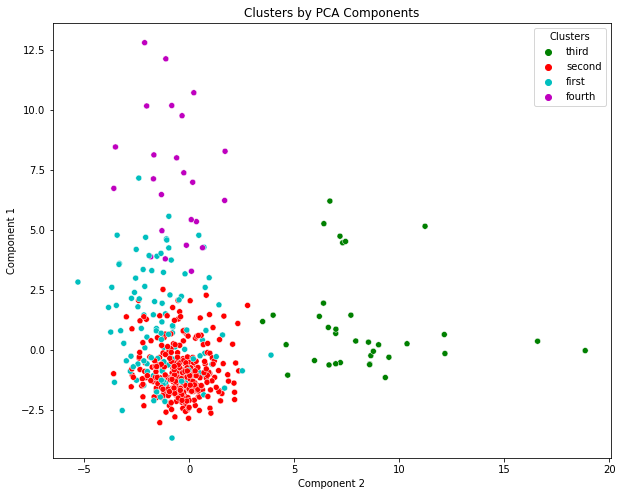

In [72]:
#Görselleştirelim
x_axis = sample_pca_kmeans['Component 2']
y_axis = sample_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = sample_pca_kmeans['Clusters'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show();